In [5]:
# Importing Essential Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# importing machine learning and stats libraries:
from scipy.stats import boxcox

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

In [6]:
# Import and load data from a CSV file named 'creditcardfraud.csv

data = pd.read_csv('C:/Users/user/Desktop/Python/Main_Projects/Credit_Card_Fraud_dataset/creditcardfraud.csv')

In [7]:
# Creating a copy of the dataset to preserve the original data for reference and analysis

df = data.copy()

In [8]:
# Randomly select and display 2 sample rows from the 'df' DataFrame

df.sample(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
806223,806223,2019-12-05 23:56:45,3577663406369449,fraud_Monahan-Morar,personal_care,5.85,Cody,Hooper,M,7233 John Parks,Lepanto,AR,72354,35.6069,-90.3359,2470,Counselling psychologist,1968-10-06,3b8d74af25c4822b350e0efce4862267,1354751805,36.345493,-90.962549,0
938313,938313,2020-01-09 03:55:26,4998109455173950,fraud_Heidenreich PLC,grocery_pos,186.19,Mary,Pruitt,F,2819 Luke Greens Suite 563,Kansas City,MO,64114,38.9621,-94.5959,545147,Counsellor,1987-11-18,9d6cda025539708eb1f0cc9d8175ed01,1357703726,38.539761,-94.225787,0


In [9]:
# Retrieve information about the structure and attributes of the 'df' DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
# Handling Missing Values: Calculate the count of missing values in each colum

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Counting Duplicates: Calculate the number of duplicated rows in the DataFrame

df.duplicated().sum()

0

In [12]:
# Count the number of unique values in each column of the 'df' DataFrame

df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [13]:
# Retrieve the list of column names in the 'df' DataFrame

df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

##### Feature engineering

In [14]:
# Convert the 'trans_date_trans_time' column to datetime format in the 'df' DataFrame

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [15]:
# Feature engineering: Extract Year, hour, day of the week, and month from the 'trans_date_trans_time' column and create new columns in the 'df' DataFrame

df['Year'] = df['trans_date_trans_time'].dt.year
df['Hour'] = df['trans_date_trans_time'].dt.hour
df['Day'] = df['trans_date_trans_time'].dt.day_of_week
df['Month'] = df['trans_date_trans_time'].dt.month

In [16]:
# # Creating a new column called Transaction date and converting into datetime datatype

# pd.to_datetime(df['trans_date_trans_time'], format='%Y:%M:%D').dt.date
# # df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])

In [17]:
# Creating a new column called Age

df['Age'] = round((df['trans_date_trans_time'] - df['dob']).dt.days / 365).astype('int')

In [18]:
# Remove the 'trans_date_trans_time' column from the 'df' DataFrame

df.drop(columns=['trans_date_trans_time', 'Unnamed: 0'], inplace=True)

In [19]:
# Display the first 3 rows of the 'df' DataFrame for a quick overview of the data

df.head(3)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Year,Hour,Day,Month,Age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,0,1,1,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,0,1,1,41
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,0,1,1,57


## **EDA**

In [20]:
# What are the top 10 states with the highest counts of fraud transactions in the 'df' DataFrame

df_fraud = df[df['is_fraud'] == 1]

state_fraud = df_fraud.groupby('state')['is_fraud'].value_counts().reset_index().sort_values(by='count', ascending=False)
state_fraud.drop(columns=['is_fraud'], inplace=True)
state_fraud.rename(columns={'count' : 'Total_Fraud_count'}).reset_index(drop=True).head(10)

,state,Total_Fraud_count
0,NY,555
1,TX,479
2,PA,458
3,CA,326
4,OH,321
5,FL,281
6,IL,248
7,MI,238
8,AL,215
9,MN,207


In [21]:
# What days of the week has the highest counts of fraud transactions in the 'df' DataFrame

day_fraud = df_fraud.groupby('Day')['is_fraud'].value_counts().reset_index().sort_values(by='count', ascending=False)
day_fraud.drop(columns=['is_fraud'], inplace=True)
day_fraud.rename(columns={'count' : 'Total_Fraud_count'}).reset_index(drop=True)

,Day,Total_Fraud_count
0,5,1227
1,6,1216
2,0,1182
3,4,1079
4,3,1008
5,1,935
6,2,859


In [22]:
# What hours of the day has the highest counts of fraud transactions

hour_fraud = df_fraud.groupby('Hour')['is_fraud'].value_counts().reset_index().sort_values(by='count', ascending=False)
hour_fraud.drop(columns=['is_fraud'], inplace=True)
hour_fraud.rename(columns={'count' : 'Total_Fraud_count'}).reset_index(drop=True).head(10)

,Hour,Total_Fraud_count
0,22,1931
1,23,1904
2,1,658
3,0,635
4,2,625
5,3,609
6,14,86
7,19,81
8,18,81
9,13,80


In [23]:
# How many unique fraud transactions ('Num_of_fraud_tran') and unique fraud customers ('Num_of_fraud_Customer') are there for each month

month_fraud = df_fraud.groupby('Month')[['trans_num','cc_num']].nunique().reset_index()
month_fraud.rename(columns={'trans_num' : 'Num_of_fraud_tran', 'cc_num' : 'Num_of_fraud_Customer'}, inplace=True)
month_fraud

,Month,Num_of_fraud_tran,Num_of_fraud_Customer
0,1,849,90
1,2,853,88
2,3,938,94
3,4,678,77
4,5,935,96
5,6,688,71
6,7,331,36
7,8,382,39
8,9,418,44
9,10,454,50


In [24]:
# What is the proportion of fraud transactions for each gender, and how does it compare to the total number of unique transactions ('trans_num') by gender

fraud_per = df.groupby('gender')['is_fraud'].value_counts(normalize=True).reset_index()
fraud_per = fraud_per[fraud_per['is_fraud']==1].reset_index(drop=True)
fraud_per['proportion'] = fraud_per['proportion']*100

df_gender = df.groupby('gender')['trans_num'].nunique().reset_index()
df_gender['fraud_Per'] = fraud_per['proportion']
df_gender.rename(columns={'trans_num' : 'Total_transactions'})

,gender,Total_transactions,fraud_Per
0,F,709863,0.526158
1,M,586812,0.642625


In [25]:
# What is the proportion of fraud transactions for each category, and how does it correlate with the total number of unique transactions ('trans_num') in each category

fraud_per = df.groupby('category')['is_fraud'].value_counts(normalize=True).reset_index()
fraud_per = fraud_per[fraud_per['is_fraud']==1].reset_index(drop=True)
fraud_per['proportion'] = fraud_per['proportion']*100

df_catg = df.groupby('category')['trans_num'].nunique().reset_index().sort_values(by='trans_num', ascending=False)
df_catg['fraud_Per'] = fraud_per['proportion']
df_catg.reset_index(drop=True, inplace=True)
df_catg.rename(columns={'trans_num' : 'Total_transactions'})

,category,Total_transactions,fraud_Per
0,gas_transport,131659,0.469394
1,grocery_pos,123638,1.409761
2,home,123115,0.160825
3,shopping_pos,116672,0.722538
4,kids_pets,113035,0.211439
5,shopping_net,97543,1.756149
6,entertainment,94014,0.247835
7,food_dining,91461,0.165098
8,personal_care,90758,0.242403
9,health_fitness,85879,0.154869


In [26]:
# What is the proportion of fraud transactions ('fraud_trans_per') for each job category, and how does it relate to the total number of transactions and total fraud transactions by job

total_trans_job = df.groupby('job')['trans_num'].count().reset_index()

fraud_trans_df = df_fraud.groupby('job')['trans_num'].count().reset_index()

fn_df = total_trans_job.merge(fraud_trans_df, how='inner', on=['job'])
fn_df.rename(columns={'trans_num_x' : 'total_num_transactions', 'trans_num_y' : 'total_num_fraud_trans'}, inplace=True)
fn_df['fraud_trans_per'] = round(fn_df['total_num_fraud_trans'] / fn_df['total_num_transactions'] *100, 2)

fn_df.sort_values(by='total_num_transactions', ascending=False).reset_index(drop=True)


,job,total_num_transactions,total_num_fraud_trans,fraud_trans_per
0,Film/video editor,9779,44,0.45
1,Exhibition designer,9199,51,0.55
2,Naval architect,8684,53,0.61
3,"Surveyor, land/geomatics",8680,50,0.58
4,Materials engineer,8270,62,0.75
...,...,...,...,...
438,Armed forces technical officer,8,8,100.00
439,Information officer,8,8,100.00
440,Ship broker,7,7,100.00
441,Warehouse manager,7,7,100.00


In [27]:
# Which job categories have the highest proportions of fraud transactions, and how are they ranked in descending order?

fn_df.sort_values(by='fraud_trans_per', ascending=False).reset_index(drop=True)

,job,total_num_transactions,total_num_fraud_trans,fraud_trans_per
0,Armed forces technical officer,8,8,100.00
1,"Engineer, site",12,12,100.00
2,Information officer,8,8,100.00
3,Legal secretary,12,12,100.00
4,Industrial buyer,10,10,100.00
...,...,...,...,...
438,Statistician,2599,3,0.12
439,Health physicist,3034,3,0.10
440,Contractor,3023,2,0.07
441,Chartered loss adjuster,5135,3,0.06


In [28]:
# Creating a copy of the dataset to preserve the 'df' dataset for reference and analysis

scaled_df = df.copy()

In [29]:
scaled_df.drop(columns={'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'merch_lat', 'unix_time', 'merch_long'}, inplace=True)

In [30]:
fraud_col = scaled_df['is_fraud']

scaled_df.drop(columns=['is_fraud'], inplace=True)

In [31]:
scaled_df = pd.concat([scaled_df, fraud_col], axis=1)

In [32]:
scaled_df.head()

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age,is_fraud
0,misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",2019,0,1,1,31,0
1,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,2019,0,1,1,41,0
2,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,2019,0,1,1,57,0
3,gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,2019,0,1,1,52,0
4,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,2019,0,1,1,33,0


In [33]:
scaled_df['job'].value_counts(ascending=False).head(15)

job
Film/video editor                      9779
Exhibition designer                    9199
Naval architect                        8684
Surveyor, land/geomatics               8680
Materials engineer                     8270
Designer, ceramics/pottery             8225
Systems developer                      7700
IT trainer                             7679
Financial adviser                      7659
Environmental consultant               7547
Chartered public finance accountant    7210
Scientist, audiological                7174
Chief Executive Officer                7172
Copywriter, advertising                7146
Comptroller                            6730
Name: count, dtype: int64

In [34]:
# Top 15 job by Frequency in the dataset

Top_15_job = scaled_df['job'].value_counts(ascending=False).head(15)

# Categorizing 'job' into top 15 job and grouping the rest as 'Other'

scaled_df['job'] = scaled_df['job'].apply(lambda x: x if x in Top_15_job else 'Other')

In [35]:
# Display the first 3 rows of the 'scaled_df' DataFrame for a quick overview of the data

scaled_df.head(3)

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age,is_fraud
0,misc_net,4.97,F,36.0788,-81.1781,3495,Other,2019,0,1,1,31,0
1,grocery_pos,107.23,F,48.8878,-118.2105,149,Other,2019,0,1,1,41,0
2,entertainment,220.11,M,42.1808,-112.2620,4154,Other,2019,0,1,1,57,0


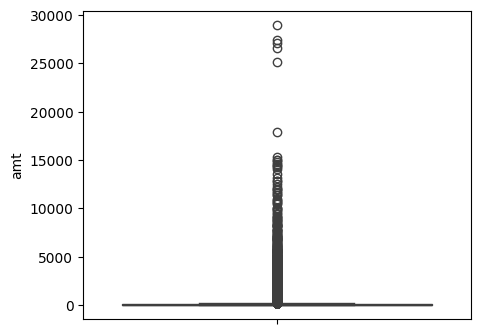

In [36]:
# Create a boxplot to visualize the distribution of the 'amt' column

plt.figure(figsize=(5,4))
sns.boxplot(scaled_df['amt'])

plt.show()

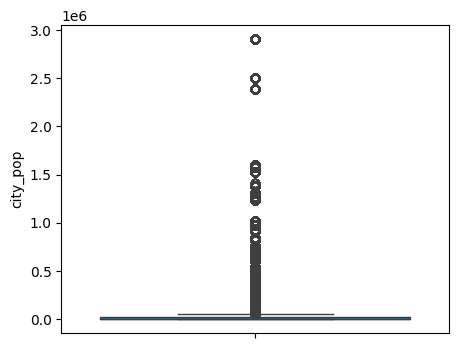

In [37]:
# Create a boxplot to visualize the distribution of the 'City Population' column

plt.figure(figsize=(5,4))
sns.boxplot(scaled_df['city_pop'])

plt.show()

In [38]:
# Calculate and print the skewness of the 'amt' and 'city_pop' columns in the 'scaled_df' DataFrame

print(scaled_df['amt'].skew())
print(scaled_df['city_pop'].skew())

42.277873790051174
5.593853066842104


In [39]:
# Handling Skewness using Box-Cox Transformation
# Apply Box-Cox transformation to 'amt' column

scaled_df['amt'] = boxcox(scaled_df['amt'])[0]
scaled_df['amt'].skew()


-0.015544943000419623

In [40]:
# Apply Box-Cox transformation to 'city_pop' column

scaled_df['city_pop'] = boxcox(scaled_df['city_pop'])[0]
scaled_df['city_pop'].skew()

0.05750405771141424

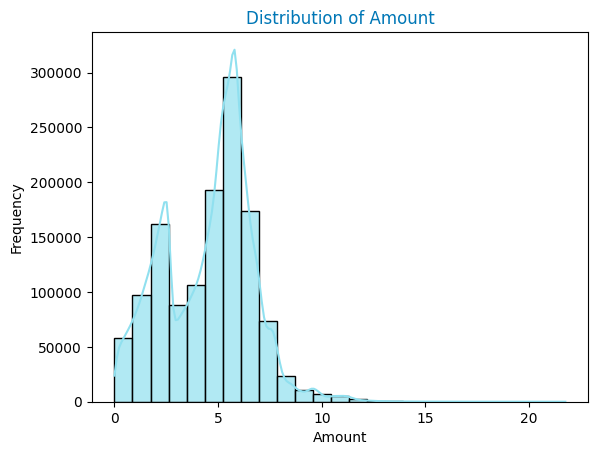

In [41]:
# Visualizing the Skewness After Transformation with a Histogram

sns.histplot(scaled_df['amt'], bins=25, kde=True, alpha=0.7, color='#90e0ef')
plt.title('Distribution of Amount', color='#0077b6')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.show()

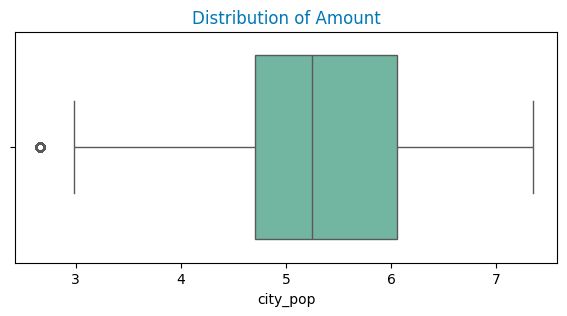

In [42]:
# visualize the distribution of 'city_pop' in the 'scaled_df' after the Boxcox Transformation

plt.figure(figsize=(7,3))
custom_palette = sns.color_palette('Set2')
sns.boxplot(scaled_df['city_pop'], palette=custom_palette, orient='h')
plt.title('Distribution of Amount', color='#0077b6')

plt.show()

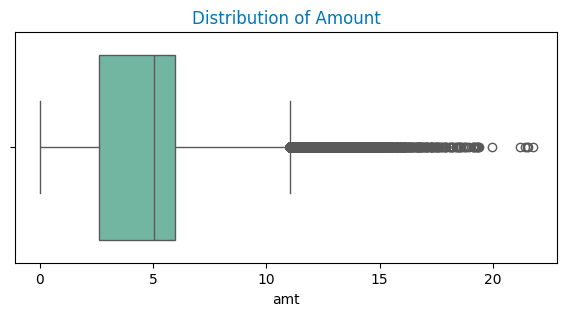

In [43]:
# visualize the distribution of 'city_pop' in the 'scaled_df' after the Boxcox Transformation

plt.figure(figsize=(7,3))
custom_palette = sns.color_palette('Set2')
sns.boxplot(scaled_df['amt'], palette=custom_palette, orient='h')
plt.title('Distribution of Amount', color='#0077b6')

plt.show()

In [44]:
# Calculating IQR for 'Amount'

Q1_amt_total = scaled_df['amt'].quantile(0.25)
Q3_amt_total = scaled_df['amt'].quantile(0.75)

IQR_amt_total = Q3_amt_total - Q1_amt_total

# Define the lower and upper bounds

lower_bound_amt_total = Q1_amt_total - 1.5 * IQR_amt_total
upper_bound_amt_total = Q3_amt_total + 1.5 * IQR_amt_total

# Print the calculated values
print("For Amount\n")
print(f'Q1: {Q1_amt_total}')
print(f'Q3: {Q3_amt_total}')
print(f'IQR: {IQR_amt_total}')
print(f'Lower Bound: {lower_bound_amt_total}')
print(f'Upper Bound: {upper_bound_amt_total}\n')

For Amount

Q1: 2.6408501906321225
Q3: 5.994031299944137
IQR: 3.3531811093120143
Lower Bound: -2.3889214733358988
Upper Bound: 11.023802963912157



In [45]:
# Identify outliers

outliers_amt = scaled_df[(scaled_df['amt'] < lower_bound_amt_total) | (scaled_df['amt'] > upper_bound_amt_total)]

print(f'Total outliers in Funding total usd : {len(outliers_amt)}')

Total outliers in Funding total usd : 5353


**Removing outliers from the Dataset**

In [46]:
rows_to_drop = outliers_amt.index.union(outliers_amt.index)

len(rows_to_drop)

5353

In [47]:
# Eliminating Outliers

scaled_df.drop(rows_to_drop, inplace=True)

### **Univariate Analysis**

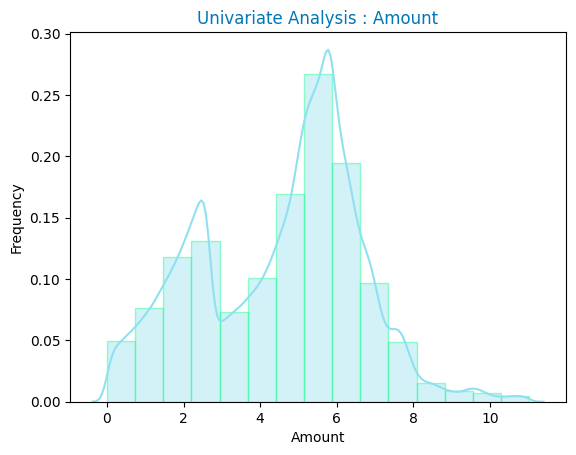

In [48]:
# Visualizing the Amount column After Transformation

sns.distplot(scaled_df['amt'], bins=15, color='#90e0ef', hist_kws={"edgecolor": "#00FF7F"}, kde=True)
plt.title('Univariate Analysis : Amount', color='#0077b6')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.show()

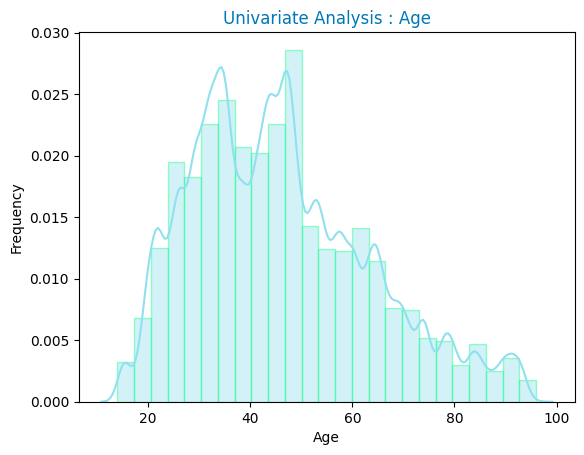

In [49]:
# Visualizing the Distribution Age column

sns.distplot(scaled_df['Age'], bins=25, color='#90e0ef', hist_kws={"edgecolor": "#00FF7F"}, kde=True)
plt.title('Univariate Analysis : Age', color='#0077b6')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

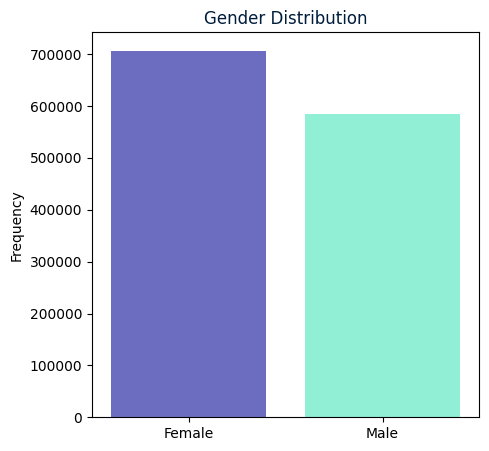

In [50]:
# Visualizing the Distribution Gender column with a Barplot

plt.figure(figsize=(5,5))
sns.barplot(x=['Female', 'Male'], y=scaled_df['gender'].value_counts(), palette={'Female': '#5e60ce', 'Male': '#80ffdb'})
plt.title('Gender Distribution', color='#001d3d')
plt.ylabel('Frequency')

plt.show()

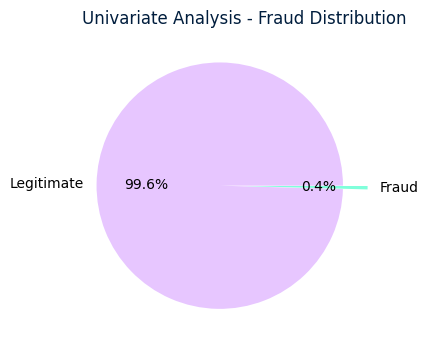

In [51]:
# Visualizing the Distribution Target Variable - is_fraud column with a Barplot

plt.figure(figsize=(6,4))
plt.pie(scaled_df['is_fraud'].value_counts(), labels=['Legitimate', 'Fraud'], colors=['#e7c6ff', '#80ffdb'], autopct='%1.1f%%', explode=(0.2, 0))
plt.title('Univariate Analysis - Fraud Distribution', color='#001d3d')

plt.show()

In [52]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Model Building on Imbalanced Data
* When dealing with heavily imbalanced data, such as in this case where only 0.4% of the transactions are labeled as fraudulent (class 1) and 99.6% are non-fraudulent (class 0), it's important to select appropriate metrics for model evaluation. Using accuracy as the sole evaluation metric is not recommended in such situations.
* The reason for this is that if a model simply predicts the majority class (class 0) for all data points, it will still achieve an accuracy of 99.6% because it correctly predicts the majority class. However, this doesn't provide any meaningful information about the model's ability to detect the minority class (class 1), which is often the primary concern in fraud detection scenarios.
* Here are some Evaluation Metrics I performed : Area Under the ROC Curve (AUC-ROC) and AUC-PR (Area Under the Precision-Recall Curve).
* When dealing with imbalanced data, there are several techniques and strategies that can be employed to build better models. Here are some approaches I consider for handling imbalanced datasets:
* Resampling Techniques: Synthetic Minority Over-sampling Technique (SMOTE) And Random Oversampling.

**Splitting the Data into X & Y**

In [53]:
x = scaled_df.drop(columns=['is_fraud'])
y = scaled_df['is_fraud']

print(f'The Shape of X: {x.shape}')
print(f'The Shape of Y: {y.shape}')

The Shape of X: (1291322, 12)
The Shape of Y: (1291322,)


**Splitting the dataset into training and testing sets**


In [54]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=1)

In [55]:
print(f'The Shape of xtrain: {xtrain.shape}')
print(f'The Shape of ytrain: {ytrain.shape}\n')
print(f'The Shape of xtest: {xtest.shape}')
print(f'The Shape of ytest: {ytest.shape}')

The Shape of xtrain: (1033057, 12)
The Shape of ytrain: (1033057,)

The Shape of xtest: (258265, 12)
The Shape of ytest: (258265,)


#### **Data Scaling**

In [57]:
scaled_df.head(2)

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age,is_fraud
0,misc_net,1.784882,F,36.0788,-81.1781,5.398057,Other,2019,0,1,1,31,0
1,grocery_pos,6.456618,F,48.8878,-118.2105,3.854018,Other,2019,0,1,1,41,0


In [58]:
# Initialize the scaler
scaler = StandardScaler()

# Define the numerical features to be scaled
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'Year', 'Age', 'Hour', 'Day', 'Month']

# Performing scaling on the numerical features for training data

xtrain_scaled = xtrain.copy()
xtrain_scaled[numerical_features] = scaler.fit_transform(xtrain[numerical_features])

# Performing scaling on the numerical features for test data

xtest_scaled = xtest.copy()
xtest_scaled[numerical_features] = scaler.transform(xtest[numerical_features])

#### **Data Encoding**

In [59]:
class OneHotEncoder:
    def __init__(self, column1, column2, column3, prefix1=None, prefix2=None, prefix3=None):
        self.column1 = column1
        self.column2 = column2
        self.column3 = column3
        self.prefix1 = prefix1 if prefix1 else column1
        self.prefix2 = prefix2 if prefix2 else column2
        self.prefix3 = prefix3 if prefix3 else column3

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Perform one-hot encoding for column1
        encoded_df1 = pd.get_dummies(X[self.column1], prefix=self.prefix1)

        # Perform one-hot encoding for column2
        encoded_df2 = pd.get_dummies(X[self.column2], prefix=self.prefix2)

        # Perform one-hot encoding for column2
        encoded_df3 = pd.get_dummies(X[self.column3], prefix=self.prefix3)

        # Convert DataFrames to integers
        encoded_df1 = encoded_df1.astype(int)
        encoded_df2 = encoded_df2.astype(int)
        encoded_df3 = encoded_df3.astype(int)

        # Concatenate encoded DataFrames with original DataFrame
        X_encoded = pd.concat([X, encoded_df1, encoded_df2, encoded_df3], axis=1)

        # Drop original columns after encoding
        X_encoded.drop(columns=[self.column1, self.column2, self.column3], inplace=True)

        return X_encoded

    def fit_transform(self, X, y=None):
        return self.transform(X)


In [60]:

# Define the columns to be one-hot encoded
column1 = 'category'
column2 = 'gender'
column3 = 'job'

# Initialize TwoColumnOneHotEncoder
encoder = OneHotEncoder(column1, column2, column3, prefix1='category', prefix2='gender', prefix3='job')

# Apply transformation on the DataFrame
xtrain_encoded = encoder.fit_transform(xtrain_scaled)
xtest_encoded = encoder.fit_transform(xtest_scaled)

In [61]:
xtrain_encoded.head(2)

,amt,lat,long,city_pop,Year,Hour,Day,Month,Age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,job_Chartered public finance accountant,job_Chief Executive Officer,job_Comptroller,"job_Copywriter, advertising","job_Designer, ceramics/pottery",job_Environmental consultant,job_Exhibition designer,job_Film/video editor,job_Financial adviser,job_IT trainer,job_Materials engineer,job_Naval architect,job_Other,"job_Scientist, audiological","job_Surveyor, land/geomatics",job_Systems developer
273124,0.026020,0.869707,0.939346,0.507289,-0.633897,-1.289870,-0.486734,-0.334179,1.204313,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
78151,0.340895,-1.592341,-0.048440,1.164416,-0.633897,-1.730066,0.877642,-1.212136,-1.207714,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
xtest_encoded.head(2)

,amt,lat,long,city_pop,Year,Hour,Day,Month,Age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,job_Chartered public finance accountant,job_Chief Executive Officer,job_Comptroller,"job_Copywriter, advertising","job_Designer, ceramics/pottery",job_Environmental consultant,job_Exhibition designer,job_Film/video editor,job_Financial adviser,job_IT trainer,job_Materials engineer,job_Naval architect,job_Other,"job_Scientist, audiological","job_Surveyor, land/geomatics",job_Systems developer
355659,-0.115032,0.149865,0.069082,0.045133,-0.633897,0.617645,0.877642,-0.041527,-0.690851,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
927745,-1.660028,-0.069472,0.325824,1.807156,1.577543,-1.143138,0.422850,-1.504788,0.687450,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### **Handling imbalanced Dataset**

In [63]:
# Oversampling with RandomOverSampler

ROS = RandomOverSampler(random_state=42)
xtrain_ros, ytrain_ros = ROS.fit_resample(xtrain_encoded, ytrain)

# Oversampling with SMOTE

SMT = SMOTE(random_state=42)
xtrain_smt, ytrain_smt = SMT.fit_resample(xtrain_encoded, ytrain)

In [64]:
print(f'The Shape of xtrain Resampled: {xtrain_smt.shape}')
print(f'The Shape of ytrain Resampled: {ytrain_smt.shape}\n')
print(f'The Shape of xtest: {xtest_scaled.shape}')
print(f'The Shape of ytest: {ytest.shape}')

The Shape of xtrain Resampled: (2056948, 41)
The Shape of ytrain Resampled: (2056948,)

The Shape of xtest: (258265, 12)
The Shape of ytest: (258265,)


In [65]:
# Checking the distribution of classes in the oversampled ytrain_ros after using SMOTE

ytrain_smt.value_counts()

is_fraud
0    1028474
1    1028474
Name: count, dtype: int64

### **Feature Extraction**

**Performing PCA (Principal Component Analysis) on the selected features to further reduce dimensionality and extract important information.**

In [ ]:
# Instantiating PCA
pca = PCA(n_components=20)

# # Fitting PCA on the selected training features
pca.fit(xtrain_smt)

#Transforming the training and testing features using the fitted PCA
pca_xtrain = pca.transform(xtrain_smt)
pca_xtest = pca.transform(xtest_encoded)

# Printing the shape of transformed training and test features
print(f'The shape of PCA-transformed Xtrain: {pca_xtrain.shape}')
print(f'The shape of PCA-transformed Xtest: {pca_xtest.shape}')

The shape of PCA-transformed Xtrain: (2056948, 20)
The shape of PCA-transformed Xtest: (258265, 20)


In [ ]:
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Explained Variance Ratio for PC{i+1}: {(ratio*100):.2f} %')


Explained Variance Ratio for PC1: 18.07 %
Explained Variance Ratio for PC2: 13.47 %
Explained Variance Ratio for PC3: 11.97 %
Explained Variance Ratio for PC4: 11.04 %
Explained Variance Ratio for PC5: 8.47 %
Explained Variance Ratio for PC6: 8.02 %
Explained Variance Ratio for PC7: 7.46 %
Explained Variance Ratio for PC8: 5.54 %
Explained Variance Ratio for PC9: 4.77 %
Explained Variance Ratio for PC10: 3.90 %
Explained Variance Ratio for PC11: 1.09 %
Explained Variance Ratio for PC12: 0.65 %
Explained Variance Ratio for PC13: 0.64 %
Explained Variance Ratio for PC14: 0.62 %
Explained Variance Ratio for PC15: 0.51 %
Explained Variance Ratio for PC16: 0.49 %
Explained Variance Ratio for PC17: 0.46 %
Explained Variance Ratio for PC18: 0.41 %
Explained Variance Ratio for PC19: 0.38 %
Explained Variance Ratio for PC20: 0.37 %


In [ ]:
# Explained Variance Ratios for Principal Components

print(f'Total Explained Variance Ratios for Principal Components: {(sum(pca.explained_variance_ratio_)*100):.2f} %')

Total Explained Variance Ratios for Principal Components: 98.34 %


## **Model Building**

---



**Model Architecture**

**Logistic Regression - SMOTE (Synthetic Minority Over-sampling Technique)**

In [66]:
# # Training a Logistic Regression model and evaluating its performance

logm = LogisticRegression(random_state=42)

# Fit the model to the training data
logm.fit(xtrain_smt, ytrain_smt)

# Predictions on the training and testing data
y_train_pred_logm = logm.predict(xtrain_smt)
y_test_pred_logm = logm.predict(xtest_encoded)

# Calculate accuracy scores for training and testing data
accuracy_train_logm = metrics.accuracy_score(ytrain_smt, y_train_pred_logm)
accuracy_test_logm = metrics.accuracy_score(ytest, y_test_pred_logm)

print(f'Accuracy Score for Training LogisticRegression : {accuracy_train_logm}')
print(f'Accuracy Score for Testing LogisticRegression : {accuracy_test_logm}')

print(f'Classification Report For Training Data and Testing Data\n')
print(metrics.classification_report(ytrain_smt, y_train_pred_logm))

print(metrics.classification_report(ytest, y_test_pred_logm))

Accuracy Score for Training LogisticRegression : 0.7943346161400289
Accuracy Score for Testing LogisticRegression : 0.8057421640562987
Classification Report For Training Data and Testing Data

              precision    recall  f1-score   support

           0       0.79      0.81      0.80   1028474
           1       0.80      0.78      0.79   1028474

    accuracy                           0.79   2056948
   macro avg       0.79      0.79      0.79   2056948
weighted avg       0.79      0.79      0.79   2056948

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    257118
           1       0.01      0.64      0.03      1147

    accuracy                           0.81    258265
   macro avg       0.51      0.72      0.46    258265
weighted avg       0.99      0.81      0.89    258265



### Decision Tree - SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# Training a DecisionTreeClassifier model and evaluating its performance

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=4)

# Fit the model to the training data
dt_model.fit(xtrain_smt, ytrain_smt)

# Predictions on the training and testing data
y_train_pred_dtm = dt_model.predict(xtrain_smt)
y_test_pred_dtm = dt_model.predict(xtest_encoded)

# Calculate accuracy scores for training and testing data
accuracy_train_dtm = metrics.accuracy_score(ytrain_smt, y_train_pred_dtm)
accuracy_test_dtm = metrics.accuracy_score(ytest, y_test_pred_dtm)

print(f'Accuracy Score for DecisionTreeClassifier Testing : {accuracy_train_dtm}')
print(f'Accuracy Score for DecisionTreeClassifier Testing : {accuracy_test_dtm}')
print('\n')
print(f'Classification Report For Training Data')
print(metrics.classification_report(ytrain_smt, y_train_pred_dtm))

print(metrics.classification_report(ytest, y_test_pred_dtm))
print(f'Classification Report For Testing Data')


Accuracy Score for DecisionTreeClassifier Testing : 1.0
Accuracy Score for DecisionTreeClassifier Testing : 0.9968830464832633


Classification Report For Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1028474
           1       1.00      1.00      1.00   1028474

    accuracy                           1.00   2056948
   macro avg       1.00      1.00      1.00   2056948
weighted avg       1.00      1.00      1.00   2056948

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257118
           1       0.61      0.80      0.70      1147

    accuracy                           1.00    258265
   macro avg       0.81      0.90      0.85    258265
weighted avg       1.00      1.00      1.00    258265

Classification Report For Testing Data


### Random Forest - SMOTE (Synthetic Minority Over-sampling Technique)

---



In [67]:
# Training a RandomForestClassifier model and evaluating its performance

rf_model = RandomForestClassifier(random_state=4, class_weight='balanced')

rf_model.fit(xtrain_smt, ytrain_smt)

# Predictions on the training and testing data
y_train_pred_rf_smt = rf_model.predict(xtrain_smt)
y_test_pred_rf_smt = rf_model.predict(xtest_encoded)

# Calculate accuracy scores for training and testing data
accuracy_train_rf_smt = metrics.accuracy_score(ytrain_smt, y_train_pred_rf_smt)
accuracy_test_rf_smt = metrics.accuracy_score(ytest, y_test_pred_rf_smt)

print(f'Accuracy Score for Random Forest Testing : {accuracy_train_rf_smt}')
print(f'Accuracy Score for Random Forest Testing : {accuracy_test_rf_smt}')
print('\n')
print(f'Classification Report For Training Data & Testing Data\n')
print(metrics.classification_report(ytrain_smt, y_train_pred_rf_smt))

print(metrics.classification_report(ytest, y_test_pred_rf_smt))

Accuracy Score for Random Forest Testing : 1.0
Accuracy Score for Random Forest Testing : 0.9986215708671325


Classification Report For Training Data & Testing Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1028474
           1       1.00      1.00      1.00   1028474

    accuracy                           1.00   2056948
   macro avg       1.00      1.00      1.00   2056948
weighted avg       1.00      1.00      1.00   2056948

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257118
           1       0.89      0.78      0.83      1147

    accuracy                           1.00    258265
   macro avg       0.95      0.89      0.92    258265
weighted avg       1.00      1.00      1.00    258265



Confusion Matrix for Testing Dataset : 


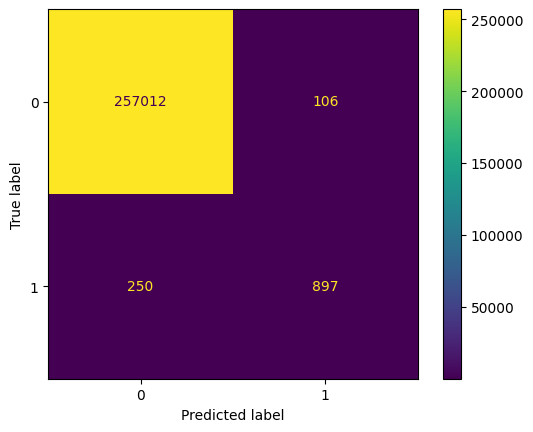

In [68]:
cm_test_rf = metrics.confusion_matrix(ytest, y_test_pred_rf_smt)

print('Confusion Matrix for Testing Dataset : ')
cm_test_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test_rf)

cm_test_dis.plot()
plt.show()

### XGB - SMOTE (Synthetic Minority Over-sampling Technique)

---



In [ ]:
# Training an XGBoost model
xgb_model = XGBClassifier(random_state=4)
xgb_model.fit(xtrain_smt, ytrain_smt)

# Predictions on the training and testing data
y_train_pred_xgb = xgb_model.predict(xtrain_smt)
y_test_pred_xgb = xgb_model.predict(xtest_encoded)

# Calculate accuracy scores for training and testing data
accuracy_train_xgb = metrics.accuracy_score(ytrain_smt, y_train_pred_xgb)
accuracy_test_xgb = metrics.accuracy_score(ytest, y_test_pred_xgb)

print(f'Accuracy Score for XGBoost Testing : {accuracy_train_xgb}')
print(f'Accuracy Score for XGBoost Testing : {accuracy_test_xgb}')
print('\n')

# Classification report for training data
print(f'Classification Report For Training Data')
print(metrics.classification_report(ytrain_smt, y_train_pred_xgb))

# Classification report for testing data
print(f'Classification Report For Testing Data')
print(metrics.classification_report(ytest, y_test_pred_xgb))

Accuracy Score for XGBoost Testing : 0.9983212993230748
Accuracy Score for XGBoost Testing : 0.996968230306081


Classification Report For Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1028474
           1       1.00      1.00      1.00   1028474

    accuracy                           1.00   2056948
   macro avg       1.00      1.00      1.00   2056948
weighted avg       1.00      1.00      1.00   2056948

Classification Report For Testing Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257118
           1       0.61      0.88      0.72      1147

    accuracy                           1.00    258265
   macro avg       0.80      0.94      0.86    258265
weighted avg       1.00      1.00      1.00    258265



### Using Random Sampler

### XGB - Random Over-sampling

In [ ]:
# Training a RandomForestClassifier model and evaluating its performance

rf_model = RandomForestClassifier(random_state=4, class_weight='balanced')

rf_model.fit(xtrain_ros, ytrain_ros)

# Predictions on the training and testing data
y_train_pred_rf_ros = rf_model.predict(xtrain_smt)
y_test_pred_rf_ros = rf_model.predict(xtest_encoded)

# Calculate accuracy scores for training and testing data
accuracy_train_rf_ros = metrics.accuracy_score(ytrain_ros, y_train_pred_rf_ros)
accuracy_test_rf_ros = metrics.accuracy_score(ytest, y_test_pred_rf_ros)

print(f'Accuracy Score for Random Forest Testing : {accuracy_train_rf_ros}')
print(f'Accuracy Score for Random Forest Testing : {accuracy_test_rf_ros}')
print('\n')
print(f'Classification Report For Training Data & Testing Data\n')
print(metrics.classification_report(ytrain_ros, y_train_pred_rf_ros))

print(metrics.classification_report(ytest, y_test_pred_rf_ros))

Accuracy Score for Random Forest Testing : 0.9029951170374749
Accuracy Score for Random Forest Testing : 0.9987299866416278


Classification Report For Training Data & Testing Data

              precision    recall  f1-score   support

           0       0.84      1.00      0.91   1028474
           1       1.00      0.81      0.89   1028474

    accuracy                           0.90   2056948
   macro avg       0.92      0.90      0.90   2056948
weighted avg       0.92      0.90      0.90   2056948

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257118
           1       0.96      0.75      0.84      1147

    accuracy                           1.00    258265
   macro avg       0.98      0.87      0.92    258265
weighted avg       1.00      1.00      1.00    258265



### Decision Tree -Random Over-sampling

In [ ]:
# Training a DecisionTreeClassifier model and evaluating its performance

dt_model_ros = DecisionTreeClassifier(class_weight='balanced', random_state=4)

dt_model_ros.fit(xtrain_ros, ytrain_ros)

y_train_pred_dt_ros = dt_model_ros.predict(xtrain_ros)
y_test_pred_dt_ros = dt_model_ros.predict(xtest_encoded)

accuracy_train_dt_ros = metrics.accuracy_score(ytrain_ros, y_train_pred_dt_ros)
accuracy_test_dt_ros = metrics.accuracy_score(ytest, y_test_pred_dt_ros)

print(f'Accuracy Score for DecisionTreeClassifier Testing : {accuracy_train_dt_ros}')
print(f'Accuracy Score for DecisionTreeClassifier Testing : {accuracy_test_dt_ros}')
print('\n')
print("Classification Report on Training Data & Testing Date:")
print(metrics.classification_report(ytrain_ros, y_train_pred_dt_ros))
print(metrics.classification_report(ytest, y_test_pred_dt_ros))

Accuracy Score for DecisionTreeClassifier Testing : 1.0
Accuracy Score for DecisionTreeClassifier Testing : 0.9981220839060655


Classification Report on Training Data & Testing Date:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1028474
           1       1.00      1.00      1.00   1028474

    accuracy                           1.00   2056948
   macro avg       1.00      1.00      1.00   2056948
weighted avg       1.00      1.00      1.00   2056948

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257118
           1       0.80      0.77      0.78      1147

    accuracy                           1.00    258265
   macro avg       0.90      0.88      0.89    258265
weighted avg       1.00      1.00      1.00    258265



### Random Forest - Random Oversampling

In [ ]:
# Training a RandomForestClassifier model and evaluating its performance

rf_model_ros = RandomForestClassifier(random_state=4, class_weight='balanced')

# Fit the RandomForestClassifier model to the resampled training data
rf_model_ros.fit(xtrain_ros, ytrain_ros)

# Predictions on the training and testing data
y_train_pred_rf_ros = rf_model_ros.predict(xtrain_ros)
y_test_pred_rf_ros = rf_model_ros.predict(xtest_encoded)

# Calculate accuracy scores for training and testing data
accuracy_train_rf_ros = metrics.accuracy_score(ytrain_ros, y_train_pred_rf_ros)
accuracy_test_rf_ros = metrics.accuracy_score(ytest, y_test_pred_rf_ros)

print("Classification Report on Training Data & Testing Date:\n")
print(metrics.classification_report(ytrain_ros, y_train_pred_rf_ros))
print(metrics.classification_report(ytest, y_test_pred_rf_ros))

Classification Report on Training Data & Testing Date:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1028474
           1       1.00      1.00      1.00   1028474

    accuracy                           1.00   2056948
   macro avg       1.00      1.00      1.00   2056948
weighted avg       1.00      1.00      1.00   2056948

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257118
           1       0.96      0.75      0.84      1147

    accuracy                           1.00    258265
   macro avg       0.98      0.87      0.92    258265
weighted avg       1.00      1.00      1.00    258265



Confusion Matrix for Testing Dataset : 


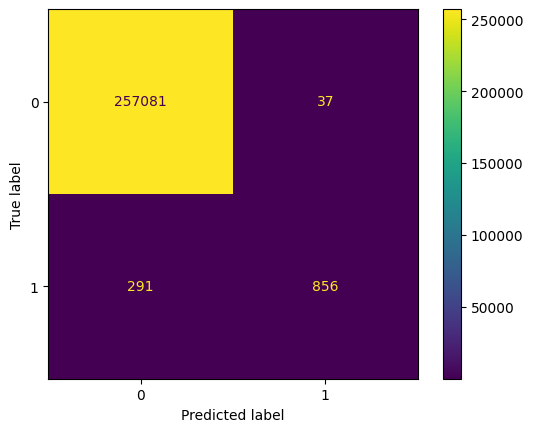

In [ ]:
cm_test_rf = metrics.confusion_matrix(ytest, y_test_pred_rf_ros)

print('Confusion Matrix for Testing Dataset : ')
cm_test_rf = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test_rf)

cm_test_rf.plot()
plt.show()

### Model Selection:
### After running different models on Oversampled data: The selection of the Random Forest classifier with Random Oversampling is well-founded due to its ability to achieve exceptional accuracy, strong precision and recall values, and a balanced trade-off between the two. It demonstrates proficiency in addressing the challenges posed by imbalanced data and holds promise for accurate fraud detection in real-world scenarios.

In [ ]:
# Predict probabilities for the positive class (class 1)

y_prob = rf_model_ros.predict_proba(xtest_encoded)[:, 1]

# Calculate AUC-ROC

fpr, tpr, thresholds = metrics.roc_curve(ytest, y_prob)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
# Calculate AUC-PR
precision, recall, _ = metrics.precision_recall_curve(ytest, y_prob)
aur_pr = metrics.auc(recall, precision)

In [ ]:
print(f"AUC-ROC: {round(roc_auc * 100, 2)}%")
print(f"AUC-PR: {round(aur_pr * 100, 2)}%")

AUC-ROC: 98.98%
AUC-PR: 90.3%


#### The model's performance in classifying the data is quite promising:
##### 1. AUC-ROC (Area Under the Receiver Operating Characteristic Curve): With an AUC-ROC of 98%, the model demonstrates an outstanding ability to distinguish between the positive and negative classes. It exhibits a high true positive rate while maintaining a low false positive rate
##### 2. AUC-PR (Area Under the Precision-Recall Curve): The AUC-PR score of 90% signifies that the model achieves a favorable balance between precision and recall, particularly for the positive class. It demonstrates a capacity to make accurate positive predictions while minimizing the risk of missing positive cases.

### In conclusion, the model exhibits strong classification performance by effectively distinguishing between classes and striking a favorable balance between precision and recall.

In [71]:
# Import the 'pickle' library to serialize and deserialize Python objects.

import pickle

with open('Model1.pkl', 'wb') as file :        # Open the 'Model.pkl' file for writing in binary mode ('wb').
    pickle.dump(rf_model, file)           # Serialize (pickle) the 'rf_model' machine learning model and save it to the file.

In [72]:
# Creating a Sample Dataset for Testing

testing_df = pd.concat([xtest, ytest], axis=1)

In [ ]:
testing_df.to_csv('testing_df.csv')

In [73]:
# Creating a Sample Dataset for Testing

sample_data1 = testing_df[testing_df['is_fraud'] == 0].sample(1)
sample_data1

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age,is_fraud
277499,home,2.277043,M,32.9276,-97.2489,6.534159,Other,2019,15,4,5,32,0


In [74]:
sample_data1 = sample_data1.drop(columns=['is_fraud'])
sample_data1

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age
277499,home,2.277043,M,32.9276,-97.2489,6.534159,Other,2019,15,4,5,32




---



In [94]:
sample_data2 = testing_df[testing_df['is_fraud'] == 1].sample(1)
sample_data2

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age,is_fraud
815115,misc_net,10.444766,F,39.3199,-106.6596,3.311195,Other,2019,23,5,12,80,1


In [95]:
sample_data2 = sample_data2.drop(columns=['is_fraud'])
sample_data2

,category,amt,gender,lat,long,city_pop,job,Year,Hour,Day,Month,Age
815115,misc_net,10.444766,F,39.3199,-106.6596,3.311195,Other,2019,23,5,12,80




---



### **Testing**

In [75]:
# Import necessary libraries
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.base import TransformerMixin

- The custom SMOTE transformer is designed to overcome the limitation of using SMOTE directly within a scikit-learn pipeline. While scikit-learn pipelines expect transformers to implement fit and transform methods, SMOTE does not conform to this interface. Therefore, a custom SMOTE transformer is necessary to integrate SMOTE seamlessly into machine learning pipelines. This custom transformer follows the scikit-learn transformer interface, allowing it to be used alongside other preprocessing steps within a pipeline. By implementing the fit and transform methods appropriately, the custom SMOTE transformer enables the oversampling of minority classes during the training phase while ensuring compatibility with scikit-learn pipelines.

In [76]:
# Custom transformer class for integrating SMOTE (Synthetic Minority Over-sampling Technique) with scikit-learn pipelines.

class SMOTETransformer(TransformerMixin):
    def __init__(self, random_state=None):
        self.random_state = random_state
        self.smote = SMOTE(random_state=random_state)

    def fit(self, X, y=None):
        # SMOTE should not be fit during the training phase
        return self

    def transform(self, X, y=None):
        if y is None:
            # Return input data unchanged if target labels are not provided (e.g., during transformation)
            return X
        else:
            # Apply SMOTE transformation during training phase
            X_resampled, y_resampled = self.smote.fit_resample(X, y)
            return X_resampled, y_resampled


In [77]:
# Define numerical and categorical features
numerical_features = ['amt', 'lat', 'long',
                      'city_pop', 'Year', 'Hour', 'Day', 'Month', 'Age']

categorical_features = ['category', 'gender', 'job']

# Define the pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Combine preprocessing steps and classifier into a pipeline
bin_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTETransformer(random_state=42)),
    ('classifier', rf_model)
])

# Now you can train the pipeline on the training data and evaluate it on the test data
bin_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amt', 'lat', 'long',
                                                   'city_pop', 'Year', 'Hour',
                                                   'Day', 'Month', 'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['category', 'gender',
                                                   'job'])])),
                ('smote',
                 <__main__.SMOTETransformer object at 0x0000014DB9F400D0>),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=4))])

**Saving the Binary Pipeline Model to a Pickle file**

In [80]:
with open('website/binary_pipeline1.pkl', 'wb') as file:
  pickle.dump(bin_pipeline, file)

### **Testing Binary Classification Model - Pipeline**

In [81]:
class PipelineTester:
  def __init__(self, pipeline_path: str, test_data: pd.DataFrame):
    self.pipeline_path = pipeline_path
    self.test_data = test_data

  def predict(self):
    with open(self.pipeline_path, 'rb') as file:
      loaded_pipeline = pickle.load(file)

      # Get the probability scores for each class
      probability_scores = loaded_pipeline.predict_proba(self.test_data)

      # Accessing the probability for fraudulent transaction
      fraud_class_prob = probability_scores[:, 1]

      # Set a threshold for classification
      threshold = 0.5

      # Apply a threshold to classify the sample
      if fraud_class_prob > threshold:
        print("This is a Fraudulent Transaction")
      else:
        print("Legitimate Transaction")

<!--  -->

In [84]:
with open('website/binary_pipeline1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [85]:
pipeline_test = PipelineTester('website/binary_pipeline1.pkl', sample_data1)
pipeline_test.predict()

Legitimate Transaction


In [96]:
pipeline_test = PipelineTester('website/binary_pipeline1.pkl', sample_data2)
pipeline_test.predict()

This is a Fraudulent Transaction
